In [1]:
using Distributions
using LinearAlgebra
using Random
using StatsPlots
default(fmt=:png)

In [2]:
function sim(disty, X::AbstractVector; L=10^5, d=6)
    n = length(X)
    Ytmp = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    XY = Vector{Float64}(undef, L)
    Xnorm = Matrix{Float64}(undef, d, L)
    distx = disty - mean(disty)
    disty0 = disty - mean(disty)
    Threads.@threads for i in 1:L
        tid = Threads.threadid()
        Y = rand!(disty0, Ytmp[tid])
        XY[i] = dot(X, Y)
        for p in 2:d
            Xnorm[p,i] = norm(X, p)
        end
        Xnorm[1,i] = maximum(abs, X)
    end
    (; XY, Xnorm)
end

function plotXY(disty, X::AbstractVector; L=10^5, d=6)
    (; XY, Xnorm) = sim(disty, X; L, d)
    plotXY(XY, Xnorm)
end

function sim(disty, distx::UnivariateDistribution, n; L=10^5, d=6)
    Xtmp = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    Ytmp = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    XY = Vector{Float64}(undef, L)
    Xnorm = Matrix{Float64}(undef, d, L)
    disty0 = disty - mean(disty)
    Threads.@threads for i in 1:L
        tid = Threads.threadid()
        X = rand!(distx, Xtmp[tid])
        Y = rand!(disty0, Ytmp[tid])
        XY[i] = dot(X, Y)
        for p in 2:d
            Xnorm[p,i] = norm(X, p)
        end
        Xnorm[1,i] = maximum(abs, X)
    end
    (; XY, Xnorm)
end

function plotXY(disty, distx::UnivariateDistribution, n; L=10^5, d=6)
    (; XY, Xnorm) = sim(disty, distx, n; L, d)
    plotXY(XY, Xnorm)
end

function plotXY(XY, Xnorm)
    d = size(Xnorm, 1)
    P1 = stephist(XY; norm=true, label="X⋅(Y - μ_Y)")
    plot!(fit(Normal, XY); ls=:dash, label="normal approx.")
    P2 = plot(; legend=:outertop)
    X2norm = Xnorm[2, 1:min(1000, end)]
    Xinfnorm = (Xnorm[1, 1:min(1000, end)] ./ X2norm)
    plot!(Xinfnorm; label="∞-norm of normalized X")
    for p in 3:d
        Xpsum = (Xnorm[p, 1:min(1000, end)] ./ X2norm) .^ p
        plot!(Xpsum; label="$(p)-power sum of normalized X", ls=:auto)
    end
    plot(P1, P2; size=(1000, 300))
end

plotXY (generic function with 3 methods)

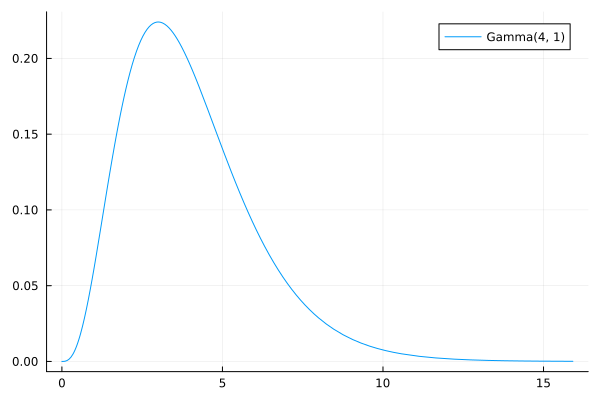

In [3]:
plot(Gamma(4, 1); label="Gamma(4, 1)")

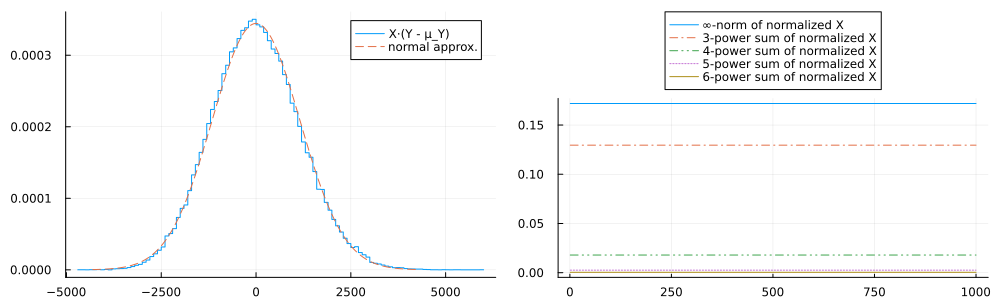

In [4]:
plotXY(Gamma(4, 1), 1:100)

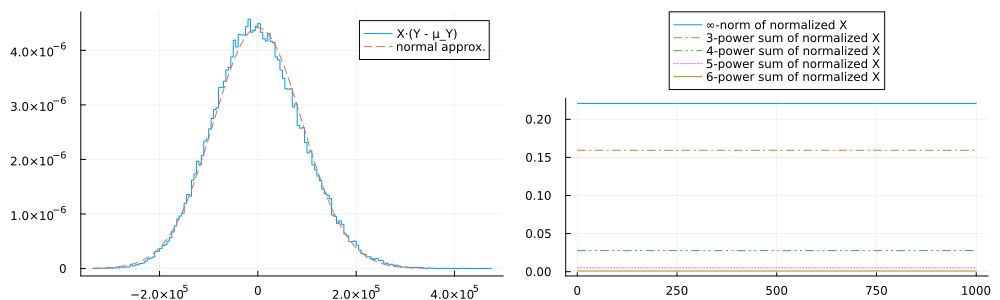

In [5]:
plotXY(Gamma(4, 1), (1:100).^2)

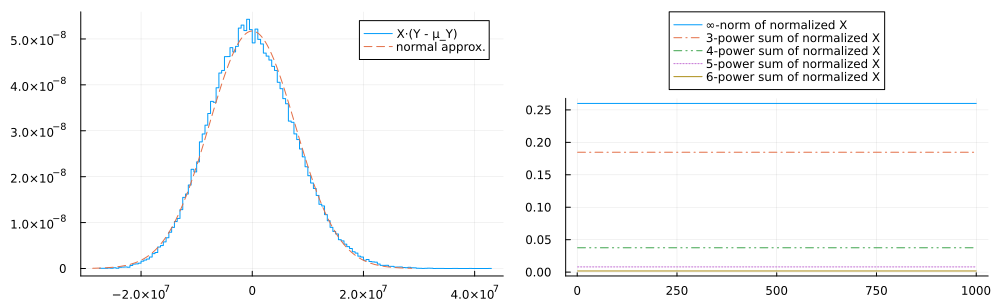

In [6]:
plotXY(Gamma(4, 1), (1:100).^3)

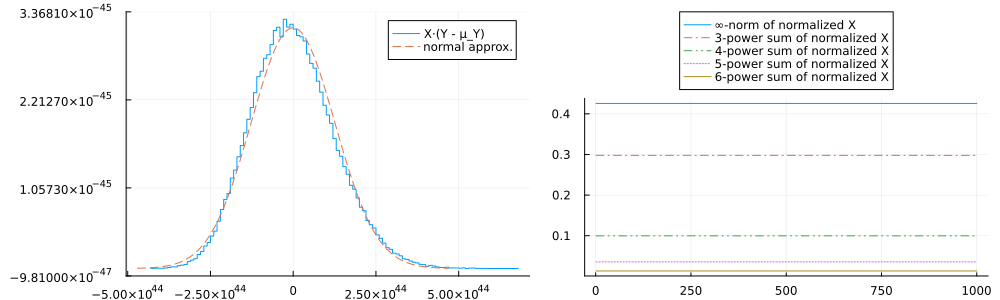

In [7]:
plotXY(Gamma(4, 1), exp.(1:0.1:100))

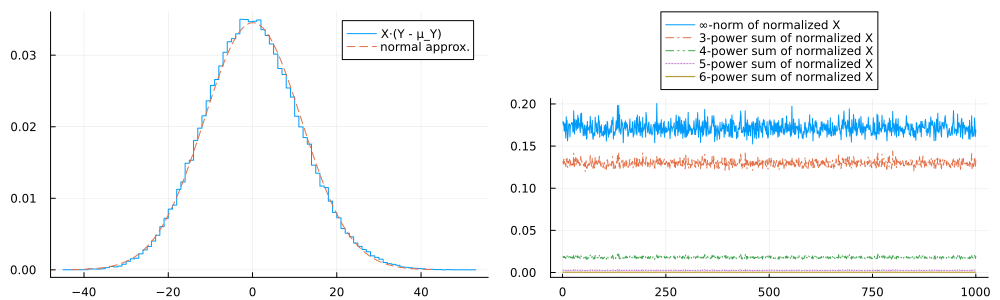

In [8]:
plotXY(Gamma(4, 1), Uniform(), 100)

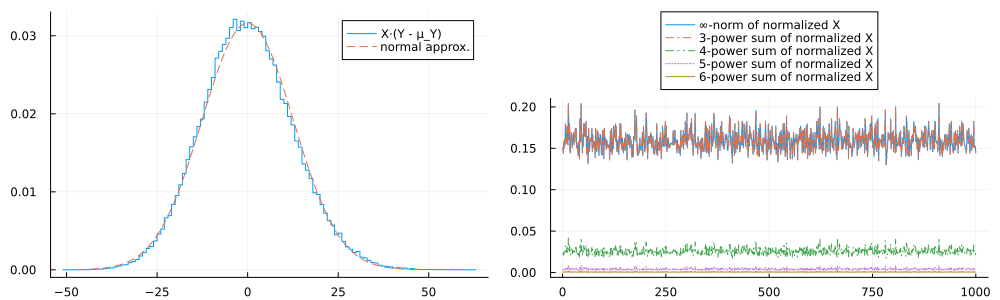

In [9]:
plotXY(Gamma(4, 1), Bernoulli(0.1), 400)

skewness(LogNormal()) = 6.184877138632554
kurtosis(LogNormal()) = 110.9363921763115


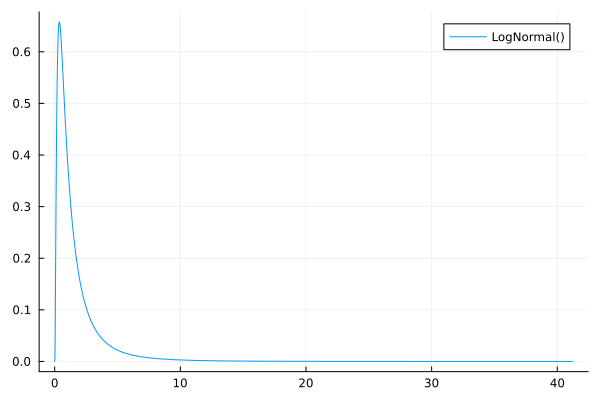

In [26]:
@show skewness(LogNormal())
@show kurtosis(LogNormal())
plot(LogNormal(); label="LogNormal()")

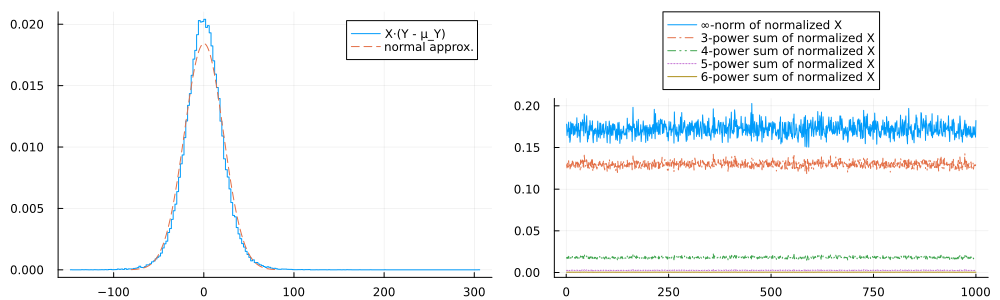

In [11]:
plotXY(LogNormal(), Uniform(-√3, √3), 100)

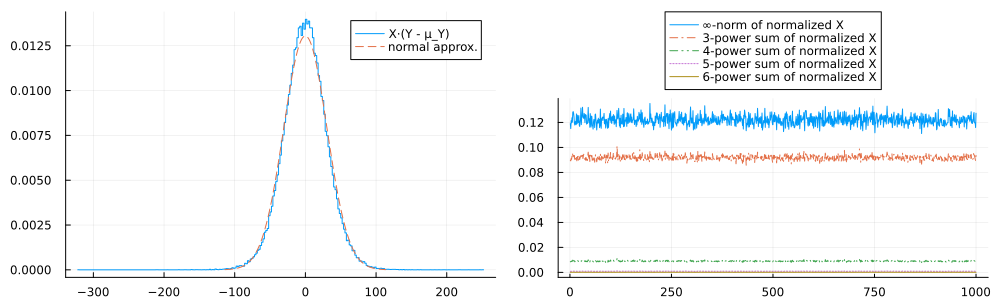

In [12]:
plotXY(LogNormal(), Uniform(-√3, √3), 200)

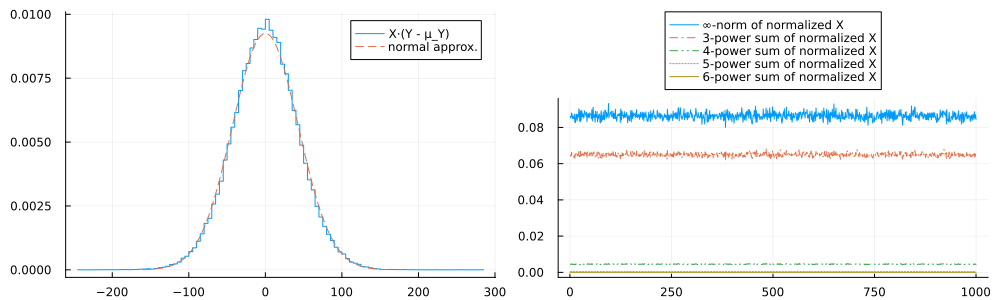

In [13]:
plotXY(LogNormal(), Uniform(-√3, √3), 400)

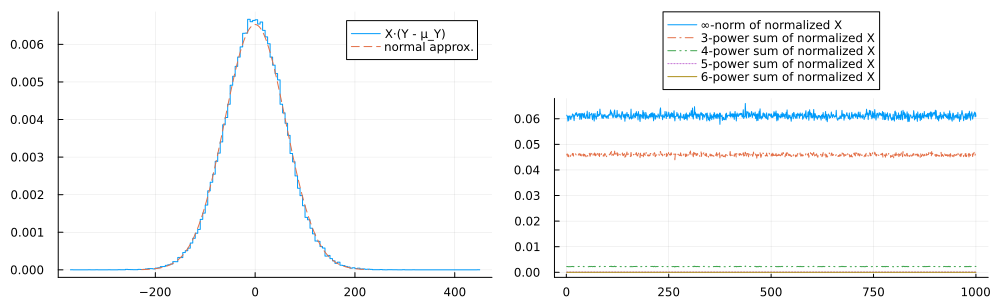

In [14]:
plotXY(LogNormal(), Uniform(-√3, √3), 800)

skewness(Bernoulli(0.1)) = 2.6666666666666665
kurtosis(Bernoulli(0.1)) = 5.111111111111109


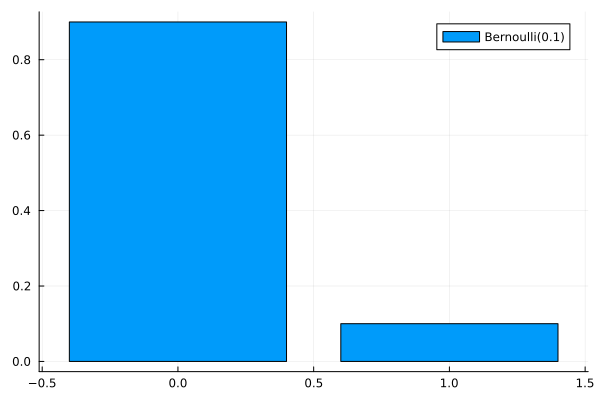

In [29]:
@show skewness(Bernoulli(0.1))
@show kurtosis(Bernoulli(0.1))
bar(Bernoulli(0.1); label="Bernoulli(0.1)")

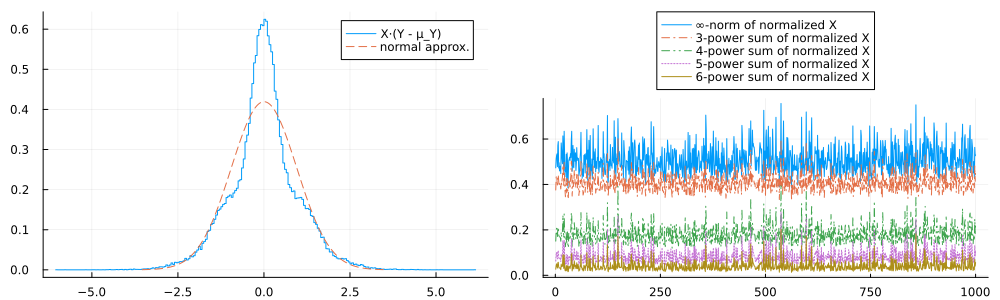

In [15]:
plotXY(Bernoulli(0.1), Uniform(-√3, √3), 10)

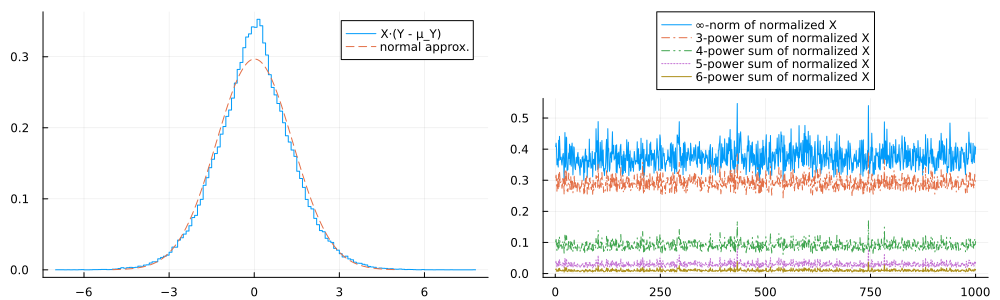

In [16]:
plotXY(Bernoulli(0.1), Uniform(-√3, √3), 20)

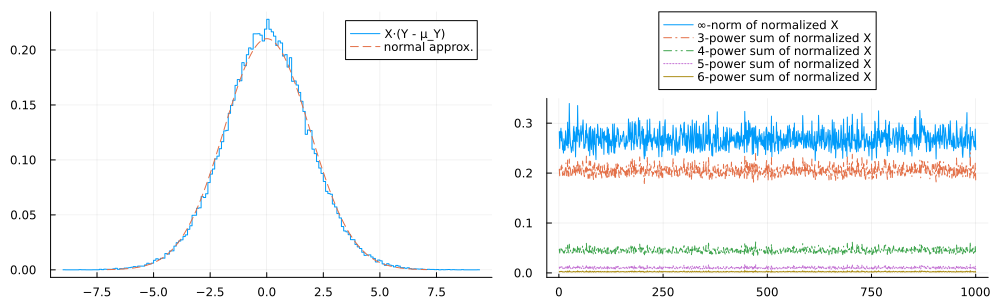

In [17]:
plotXY(Bernoulli(0.1), Uniform(-√3, √3), 40)

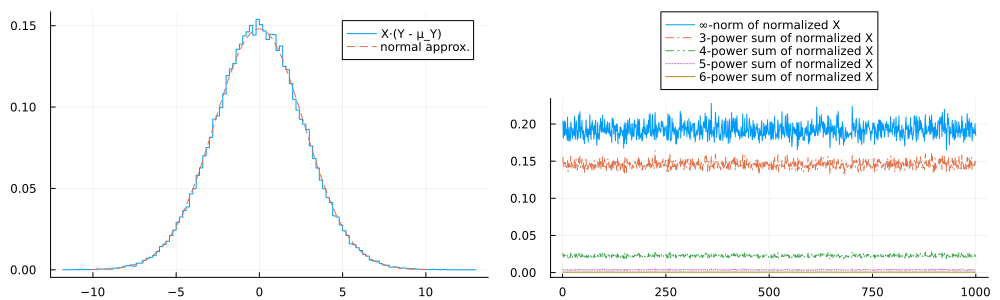

In [18]:
plotXY(Bernoulli(0.1), Uniform(-√3, √3), 80)

skewness(Exponential()) = 2.0
kurtosis(Exponential()) = 6.0


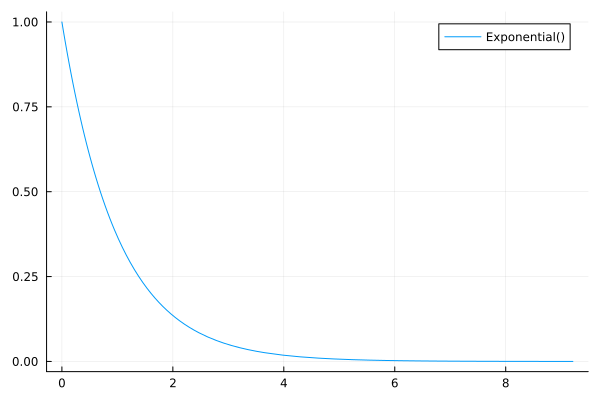

In [25]:
@show skewness(Exponential())
@show kurtosis(Exponential())
plot(Exponential(), label="Exponential()")

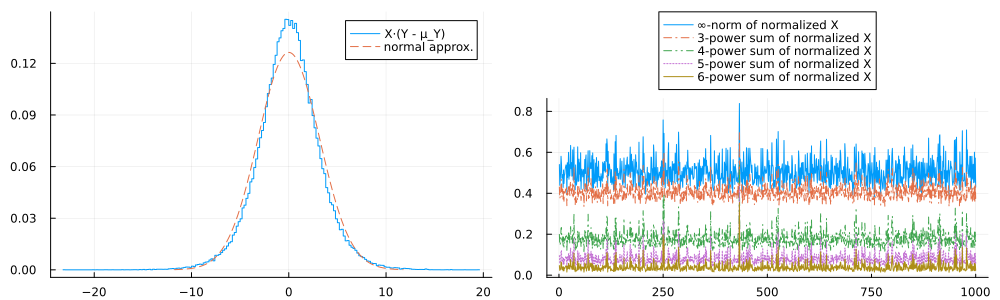

In [19]:
plotXY(Exponential(), Uniform(-√3, √3), 10)

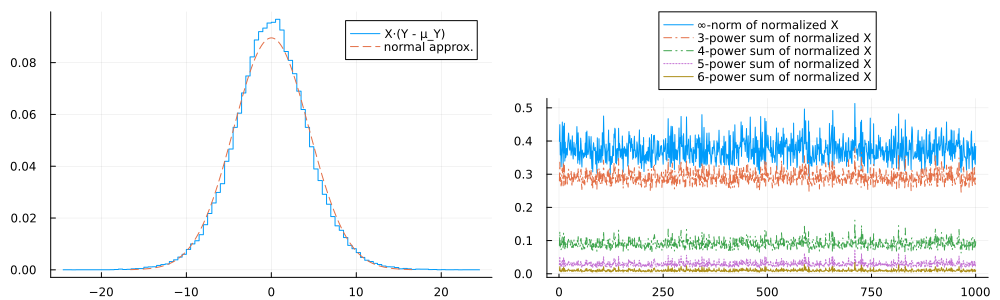

In [20]:
plotXY(Exponential(), Uniform(-√3, √3), 20)

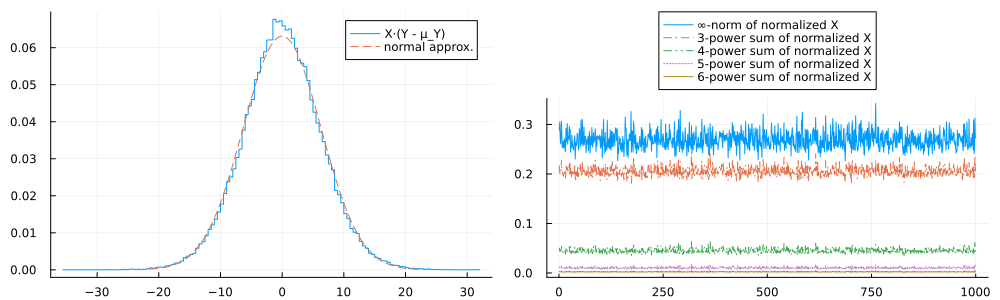

In [21]:
plotXY(Exponential(), Uniform(-√3, √3), 40)

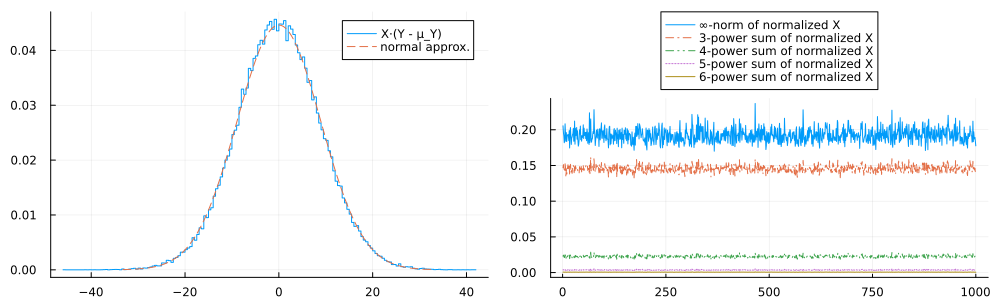

In [23]:
plotXY(Exponential(), Uniform(-√3, √3), 80)

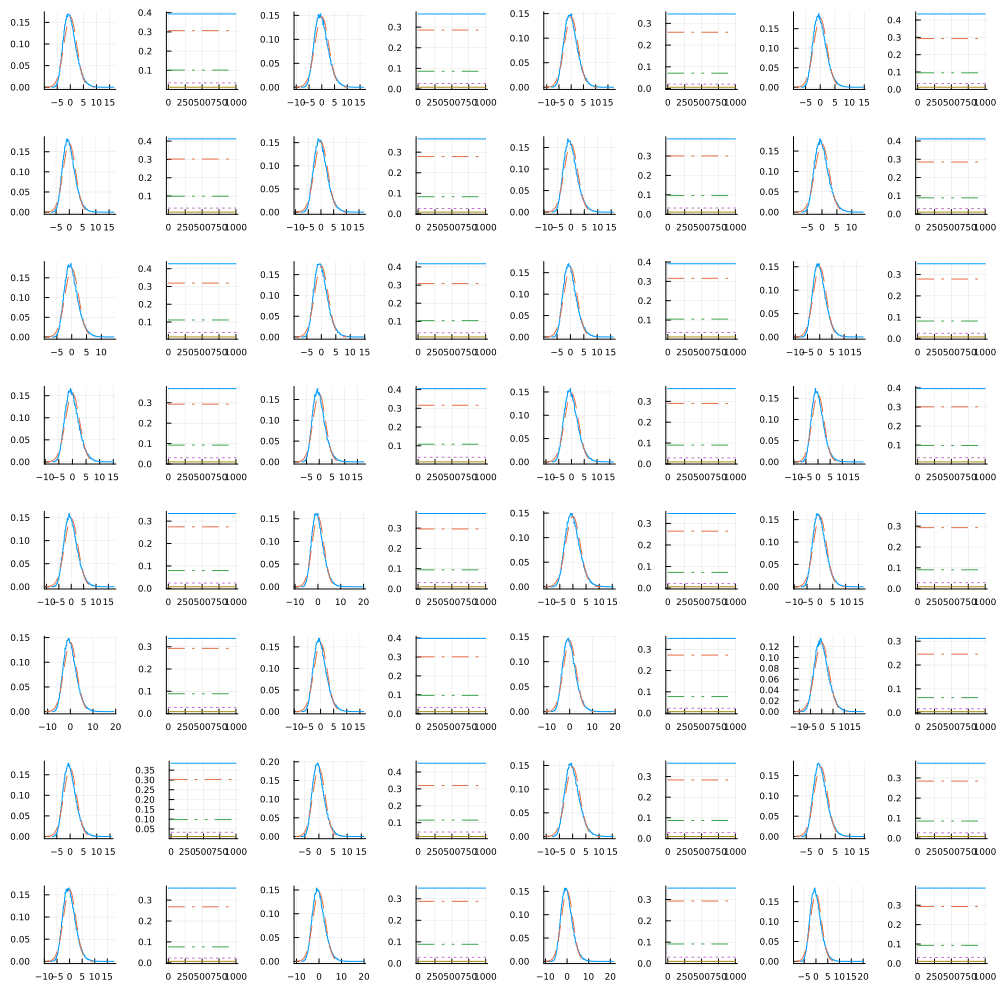

In [22]:
PP = []
for _ in 1:32
    P = plotXY(Exponential(), rand(20))
    push!(PP, P)
end
plot(PP...; size=(1000, 1000), layout=(8, 4), legend=false, tickfontsize=6)